In [1]:
from experiment.photometry import photometry
from tools.utils import create_experiment_dir
new_experiment_dir = create_experiment_dir('/Users/mingyu/Desktop/OPMD_Mingyu/results/experiment/photometry')
photometry([556], 50, new_experiment_dir, repeat=100)

Setting the wavelength of the slow source to: 556.00


Setting the wavelength of the slow source to: 556.00
2020-03-25 01:07:13.523680 Working on trial 0
2020-03-25 01:07:43.697667 Working on trial 1
2020-03-25 01:08:13.874248 Working on trial 2
2020-03-25 01:08:44.056392 Working on trial 3
2020-03-25 01:09:14.238809 Working on trial 4
2020-03-25 01:09:44.419625 Working on trial 5
2020-03-25 01:10:14.599459 Working on trial 6
2020-03-25 01:10:44.883659 Working on trial 7
2020-03-25 01:11:15.061826 Working on trial 8
2020-03-25 01:11:45.413322 Working on trial 9
2020-03-25 01:12:15.598593 Working on trial 10
2020-03-25 01:12:45.782175 Working on trial 11
2020-03-25 01:13:15.961231 Working on trial 12
2020-03-25 01:13:46.143219 Working on trial 13
2020-03-25 01:14:16.330064 Working on trial 14
2020-03-25 01:14:46.514560 Working on trial 15
2020-03-25 01:15:16.701582 Working on trial 16
2020-03-25 01:15:46.862542 Working on trial 17
2020-03-25 01:16:17.049678 Working on trial 18
2020-03-25 01:16:47.236143 Working on trial 19
2020-03-25 01:17:

2020-03-25 02:33:45.554579 Working on trial 172
2020-03-25 02:34:15.742271 Working on trial 173
2020-03-25 02:34:45.924959 Working on trial 174
2020-03-25 02:35:16.105223 Working on trial 175
2020-03-25 02:35:46.283837 Working on trial 176
2020-03-25 02:36:16.469683 Working on trial 177
2020-03-25 02:36:46.657580 Working on trial 178
2020-03-25 02:37:16.838498 Working on trial 179
2020-03-25 02:37:47.023281 Working on trial 180
2020-03-25 02:38:17.208096 Working on trial 181
2020-03-25 02:38:47.392016 Working on trial 182
2020-03-25 02:39:17.577963 Working on trial 183
2020-03-25 02:39:47.763122 Working on trial 184
2020-03-25 02:40:17.950707 Working on trial 185
2020-03-25 02:40:48.122196 Working on trial 186
2020-03-25 02:41:18.283536 Working on trial 187
2020-03-25 02:41:48.473855 Working on trial 188
2020-03-25 02:42:18.659986 Working on trial 189
2020-03-25 02:42:48.869575 Working on trial 190
2020-03-25 02:43:19.056320 Working on trial 191
2020-03-25 02:43:49.240898 Working on tr

2020-03-25 03:59:48.214665 Working on trial 343
2020-03-25 04:00:18.399396 Working on trial 344
2020-03-25 04:00:48.576771 Working on trial 345
2020-03-25 04:01:18.759242 Working on trial 346
2020-03-25 04:01:48.939842 Working on trial 347
2020-03-25 04:02:19.123812 Working on trial 348
2020-03-25 04:02:49.291410 Working on trial 349
2020-03-25 04:03:19.474138 Working on trial 350
2020-03-25 04:03:49.661766 Working on trial 351
2020-03-25 04:04:19.804314 Working on trial 352
2020-03-25 04:04:50.194954 Working on trial 353
2020-03-25 04:05:20.380078 Working on trial 354
2020-03-25 04:05:50.587970 Working on trial 355
2020-03-25 04:06:20.758014 Working on trial 356
2020-03-25 04:06:50.942495 Working on trial 357
2020-03-25 04:07:21.125287 Working on trial 358
2020-03-25 04:07:51.293680 Working on trial 359
2020-03-25 04:08:21.477446 Working on trial 360
2020-03-25 04:08:51.664592 Working on trial 361
2020-03-25 04:09:21.841985 Working on trial 362
2020-03-25 04:09:52.027406 Working on tr

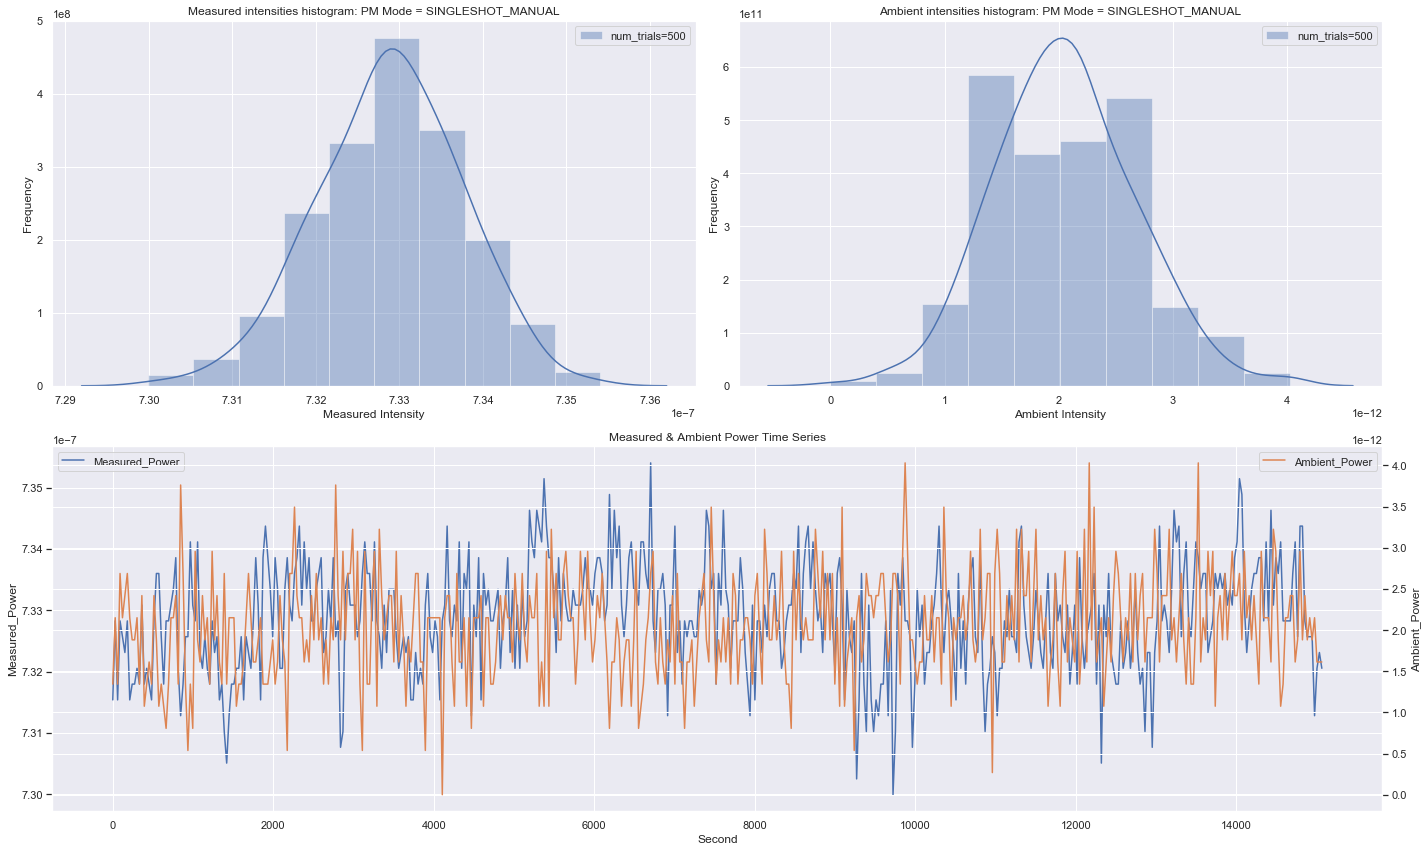

In [3]:
from calibration.powermeter import powermeter_test
from tools.utils import create_experiment_dir
new_experiment_dir = create_experiment_dir('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/spectrometer')
powermeter_test(wl=556, trials=500, pause=30,  dir=new_experiment_dir, repeat=1)

Setting the wavelength of the slow source to: 556.00
2020-03-25 05:18:52.037578 Working on trial 0
2020-03-25 05:19:52.215698 Working on trial 1
2020-03-25 05:20:52.403413 Working on trial 2
2020-03-25 05:21:52.587409 Working on trial 3
2020-03-25 05:22:52.767568 Working on trial 4
2020-03-25 05:23:52.949152 Working on trial 5
2020-03-25 05:24:53.153939 Working on trial 6
2020-03-25 05:25:53.334565 Working on trial 7
2020-03-25 05:26:53.540139 Working on trial 8
2020-03-25 05:27:53.726777 Working on trial 9
2020-03-25 05:28:54.021629 Working on trial 10
2020-03-25 05:29:54.198058 Working on trial 11
2020-03-25 05:30:54.382739 Working on trial 12
2020-03-25 05:31:54.564037 Working on trial 13
2020-03-25 05:32:54.729510 Working on trial 14
2020-03-25 05:33:54.907384 Working on trial 15
2020-03-25 05:34:55.094293 Working on trial 16
2020-03-25 05:35:55.241365 Working on trial 17
2020-03-25 05:36:55.379497 Working on trial 18
2020-03-25 05:37:55.562302 Working on trial 19
2020-03-25 05:38:

2020-03-25 08:11:23.279715 Working on trial 172
2020-03-25 08:12:23.441515 Working on trial 173
2020-03-25 08:13:23.609174 Working on trial 174
2020-03-25 08:14:23.784516 Working on trial 175
2020-03-25 08:15:23.945850 Working on trial 176
2020-03-25 08:16:24.176138 Working on trial 177
2020-03-25 08:17:24.356252 Working on trial 178
2020-03-25 08:18:24.540584 Working on trial 179
2020-03-25 08:19:24.745863 Working on trial 180
2020-03-25 08:20:24.930733 Working on trial 181
2020-03-25 08:21:25.115982 Working on trial 182
2020-03-25 08:22:25.294906 Working on trial 183
2020-03-25 08:23:25.481485 Working on trial 184
2020-03-25 08:24:25.656884 Working on trial 185
2020-03-25 08:25:25.839866 Working on trial 186
2020-03-25 08:26:26.000418 Working on trial 187
2020-03-25 08:27:26.182256 Working on trial 188
2020-03-25 08:28:26.364873 Working on trial 189
2020-03-25 08:29:26.544100 Working on trial 190
2020-03-25 08:30:26.726242 Working on trial 191
2020-03-25 08:31:26.887444 Working on tr

2020-03-25 11:02:56.626562 Working on trial 343
2020-03-25 11:03:56.804315 Working on trial 344
2020-03-25 11:04:56.993709 Working on trial 345
2020-03-25 11:05:57.168186 Working on trial 346
2020-03-25 11:06:57.376160 Working on trial 347
2020-03-25 11:07:57.563214 Working on trial 348
2020-03-25 11:08:57.748147 Working on trial 349
2020-03-25 11:09:57.932266 Working on trial 350
2020-03-25 11:10:58.111755 Working on trial 351
2020-03-25 11:11:58.299193 Working on trial 352
2020-03-25 11:12:58.519243 Working on trial 353
2020-03-25 11:13:58.717312 Working on trial 354
2020-03-25 11:14:58.893064 Working on trial 355
2020-03-25 11:15:59.271926 Working on trial 356
2020-03-25 11:16:59.958030 Working on trial 357
2020-03-25 11:18:00.581652 Working on trial 358
2020-03-25 11:19:00.756098 Working on trial 359
2020-03-25 11:20:00.936650 Working on trial 360
2020-03-25 11:21:01.120289 Working on trial 361
2020-03-25 11:22:01.302157 Working on trial 362
2020-03-25 11:23:01.505102 Working on tr

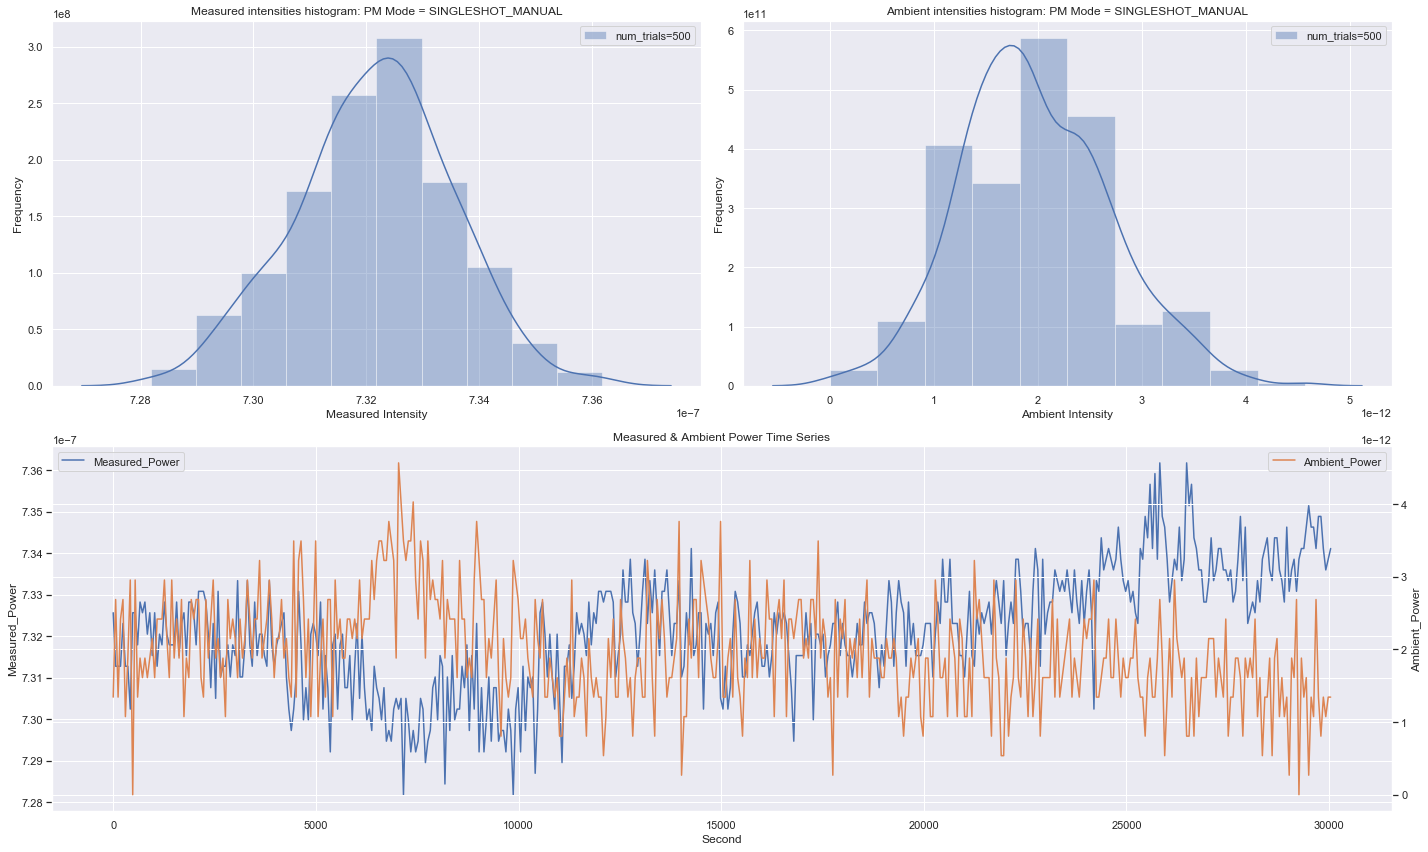

In [4]:
from calibration.powermeter import powermeter_test
from tools.utils import create_experiment_dir
new_experiment_dir = create_experiment_dir('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/powermeter')
powermeter_test(wl=556, trials=500, pause=60,  dir=new_experiment_dir, repeat=1)